<a href="https://colab.research.google.com/github/jb-seba/Spotify_TCS/blob/main/TCS_Music_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install matplotlib
import matplotlib.pyplot as plt


!pip install pandas
import pandas as pd


!pip install numpy
import numpy as np

!pip install seaborn
import seaborn as sns

!pip install scikit-learn
from sklearn import datasets, model_selection
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.datasets import make_regression

import warnings
warnings.filterwarnings('ignore')

from scipy.stats import ttest_ind

In [3]:
from google.colab import files
uploaded = files.upload()
file_path = "/content/spotify-2023.csv"
df=pd.read_csv(file_path, encoding='latin-1')
df.head(10)

Saving spotify-2023.csv to spotify-2023.csv


,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,2023,7,14,553,147,141381703,43,...,125,B,Major,80,89,83,31,0,8,4
1,LALA,Myke Towers,1,2023,3,23,1474,48,133716286,48,...,92,C#,Major,71,61,74,7,0,10,4
2,vampire,Olivia Rodrigo,1,2023,6,30,1397,113,140003974,94,...,138,F,Major,51,32,53,17,0,31,6
3,Cruel Summer,Taylor Swift,1,2019,8,23,7858,100,800840817,116,...,170,A,Major,55,58,72,11,0,11,15
4,WHERE SHE GOES,Bad Bunny,1,2023,5,18,3133,50,303236322,84,...,144,A,Minor,65,23,80,14,63,11,6
5,Sprinter,"Dave, Central Cee",2,2023,6,1,2186,91,183706234,67,...,141,C#,Major,92,66,58,19,0,8,24
6,Ella Baila Sola,"Eslabon Armado, Peso Pluma",2,2023,3,16,3090,50,725980112,34,...,148,F,Minor,67,83,76,48,0,8,3
7,Columbia,Quevedo,1,2023,7,7,714,43,58149378,25,...,100,F,Major,67,26,71,37,0,11,4
8,fukumean,Gunna,1,2023,5,15,1096,83,95217315,60,...,130,C#,Minor,85,22,62,12,0,28,9
9,La Bebe - Remix,"Peso Pluma, Yng Lvcas",2,2023,3,17,2953,44,553634067,49,...,170,D,Minor,81,56,48,21,0,8,33


#Subsetting data

In [4]:
months_df = df.sort_values(by='released_month')
months_df.head(10)
months_df

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
483,Deck The Hall - Remastered 1999,Nat King Cole,1,1959,1,1,3299,0,127027715,65,...,107,F#,Minor,69,96,36,81,0,8,4
511,Less Than Zero,The Weeknd,1,2022,1,7,2800,0,200660871,18,...,143,NaN,Major,53,50,79,0,0,8,3
509,Gasoline,The Weeknd,1,2022,1,7,2297,0,116903579,11,...,123,F#,Minor,74,35,73,0,0,21,5
508,How Do I Make You Love Me?,The Weeknd,1,2022,1,7,1915,0,119238316,7,...,121,G,Minor,80,62,51,2,0,9,8
503,Fingers Crossed,"Lauren Spencer Smith, Lauren Spencer Smith, La...",3,2022,1,5,2235,0,349585590,65,...,109,F,Major,60,45,47,62,0,31,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
468,Open Arms (feat. Travis Scott),"SZA, Travis Scott",2,2022,12,8,1420,4,155653938,13,...,78,A,Major,67,22,59,76,1,15,16
493,Too Late,SZA,1,2022,12,8,714,0,49262961,0,...,128,B,Major,45,35,68,78,0,39,8
481,Raindrops (Insane) [with Travis Scott],"Travis Scott, Metro Boomin",2,2022,12,2,880,0,110649992,3,...,112,G#,Major,80,15,54,9,0,38,5
484,Smoking on my Ex Pack,SZA,1,2022,12,9,811,0,57144458,6,...,81,G#,Major,47,33,68,24,0,22,38


In [4]:
# converting mode values to numerical
mode_mapping = {'Major': 'Major', 'Minor': 'Minor'}
months_df['mode'] = df['mode'].map(mode_mapping)
months_df['bpm'].unique()
months_df['streams'].unique()
# converting streams values to numerical
months_df['streams'] = pd.to_numeric(months_df['streams'], errors='coerce')
df["streams"] = pd.to_numeric(df["streams"], errors='coerce')
months_df["streams"].unique()
months_df.groupby('released_month')[['bpm', 'mode', 'streams']].mean()
months_df.groupby('released_month')['mode'].unique()
mode_mapping = {'Major': 'Major', 'Minor': 'Minor'}
months_df['mode'] = df['mode'].map(mode_mapping)
months_df.head(10)
mode_mapping = {'Major': 'Major', 'Minor': 'Minor'}
months_df['mode'] = df['mode'].map(mode_mapping)
df["mode"] = df["mode"].map(mode_mapping)
months_df.groupby('released_month')[['bpm', 'mode', 'streams']].mean()


TypeError: agg function failed [how->mean,dtype->object]

Encoding mode column to convert to numerical values

In [3]:
from google.colab import files
uploaded = files.upload()
file_path = "/content/spotify-2023.csv"
new_df=pd.read_csv(file_path, encoding='latin-1')
new_df.head(10)
modes_encoded = pd.get_dummies(new_df, columns=['mode'])



Saving spotify-2023.csv to spotify-2023.csv


In [4]:
modes_encoded = pd.get_dummies(new_df, columns=['mode'])
modes_encoded.head(10)

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,key,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%,mode_Major,mode_Minor
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,2023,7,14,553,147,141381703,43,...,B,80,89,83,31,0,8,4,True,False
1,LALA,Myke Towers,1,2023,3,23,1474,48,133716286,48,...,C#,71,61,74,7,0,10,4,True,False
2,vampire,Olivia Rodrigo,1,2023,6,30,1397,113,140003974,94,...,F,51,32,53,17,0,31,6,True,False
3,Cruel Summer,Taylor Swift,1,2019,8,23,7858,100,800840817,116,...,A,55,58,72,11,0,11,15,True,False
4,WHERE SHE GOES,Bad Bunny,1,2023,5,18,3133,50,303236322,84,...,A,65,23,80,14,63,11,6,False,True
5,Sprinter,"Dave, Central Cee",2,2023,6,1,2186,91,183706234,67,...,C#,92,66,58,19,0,8,24,True,False
6,Ella Baila Sola,"Eslabon Armado, Peso Pluma",2,2023,3,16,3090,50,725980112,34,...,F,67,83,76,48,0,8,3,False,True
7,Columbia,Quevedo,1,2023,7,7,714,43,58149378,25,...,F,67,26,71,37,0,11,4,True,False
8,fukumean,Gunna,1,2023,5,15,1096,83,95217315,60,...,C#,85,22,62,12,0,28,9,False,True
9,La Bebe - Remix,"Peso Pluma, Yng Lvcas",2,2023,3,17,2953,44,553634067,49,...,D,81,56,48,21,0,8,33,False,True


In [5]:
new_months_df=modes_encoded.sort_values(by='released_month')
new_months_df.head(10)

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,key,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%,mode_Major,mode_Minor
483,Deck The Hall - Remastered 1999,Nat King Cole,1,1959,1,1,3299,0,127027715,65,...,F#,69,96,36,81,0,8,4,False,True
511,Less Than Zero,The Weeknd,1,2022,1,7,2800,0,200660871,18,...,NaN,53,50,79,0,0,8,3,True,False
509,Gasoline,The Weeknd,1,2022,1,7,2297,0,116903579,11,...,F#,74,35,73,0,0,21,5,False,True
508,How Do I Make You Love Me?,The Weeknd,1,2022,1,7,1915,0,119238316,7,...,G,80,62,51,2,0,9,8,False,True
503,Fingers Crossed,"Lauren Spencer Smith, Lauren Spencer Smith, La...",3,2022,1,5,2235,0,349585590,65,...,F,60,45,47,62,0,31,5,True,False
504,Out of Time,The Weeknd,1,2022,1,7,3711,0,339659802,49,...,NaN,65,82,74,27,0,32,5,False,True
502,Is There Someone Else?,The Weeknd,1,2022,1,7,2881,6,391251368,13,...,A,70,60,58,4,0,16,3,False,True
501,Sacrifice,The Weeknd,1,2022,1,7,4440,0,326792833,81,...,G,70,91,79,3,0,7,10,True,False
65,Yellow,Chris Molitor,1,1999,1,1,31358,43,1755214421,196,...,B,43,28,66,0,0,23,3,True,False
496,Jingle Bells - Remastered 1999,Frank Sinatra,1,1957,1,1,4326,0,178660459,32,...,G#,51,94,34,73,0,10,5,True,False


In [6]:
# converting streams to numeric
new_months_df['streams'] = pd.to_numeric(new_months_df['streams'], errors='coerce')
new_months_df.groupby('released_month')[['bpm', 'mode_Major', 'mode_Minor', 'streams']].mean()
new_months_df.head(10)
new_months_df["released_year"].unique()
new_years_df=new_months_df.sort_values(by='released_year')
new_years_df.head(10)
new_years_df["released_year"].unique()
new_months_df["bpm"].unique()
new_months_df.groupby('released_month')[['bpm', 'mode_Major', 'mode_Minor', 'streams', 'bpm']].mean()
new_years_df.groupby('released_year')[['bpm', 'mode_Major', 'mode_Minor', 'streams', 'released_month']].mean()

,bpm,mode_Major,mode_Minor,streams,released_month
released_year,,,,,
1930,130.000000,0.000000,1.000000,9.059852e+07,1.000000
1942,96.000000,1.000000,0.000000,3.955914e+08,1.000000
1946,139.000000,1.000000,0.000000,3.897720e+08,11.000000
1950,143.000000,1.000000,0.000000,4.732483e+08,1.000000
1952,140.000000,1.000000,0.000000,3.955914e+08,1.000000
1957,147.000000,1.000000,0.000000,4.599810e+08,1.000000
1958,135.000000,0.666667,0.333333,4.368543e+08,1.000000
1959,120.500000,0.500000,0.500000,2.867089e+08,6.000000
1963,140.000000,1.000000,0.000000,4.370878e+08,10.666667


# Visualizing data

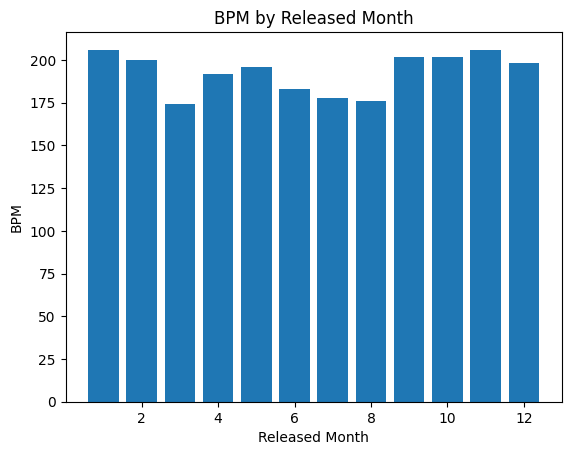

In [17]:
plt.bar(months_df['released_month'], months_df['bpm'])
plt.xlabel('Released Month')
plt.ylabel('BPM')
plt.title('BPM by Released Month')
plt.show()

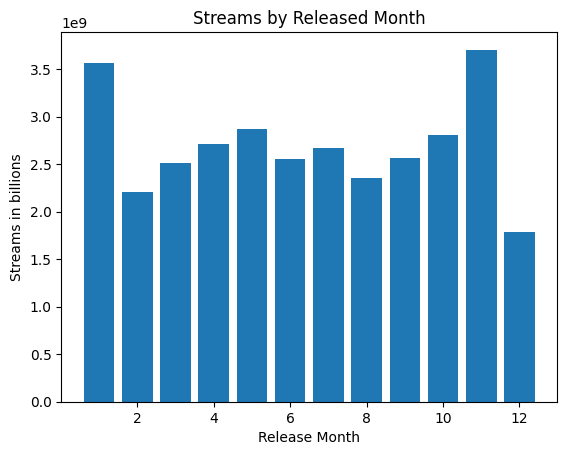

In [22]:
plt.bar(months_df['released_month'], months_df['streams'])
plt.xlabel('Release Month')
plt.ylabel('Streams in billions')
plt.title('Streams by Released Month')
plt.show()

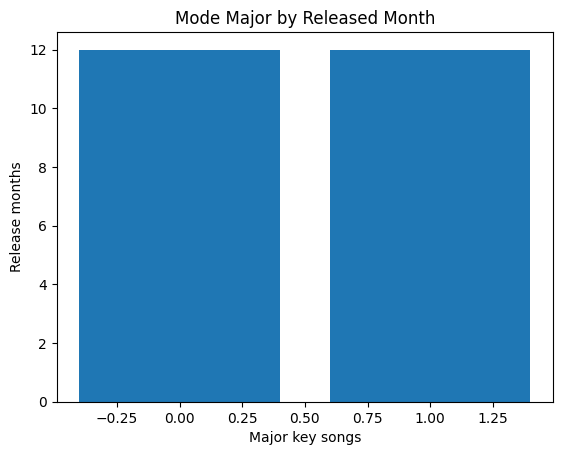

In [10]:
plt.bar(new_years_df['mode_Major'], new_years_df['released_month'])
plt.xlabel('Major key songs')
plt.ylabel('Release months')
plt.title('Mode Major by Released Month')
plt.show()

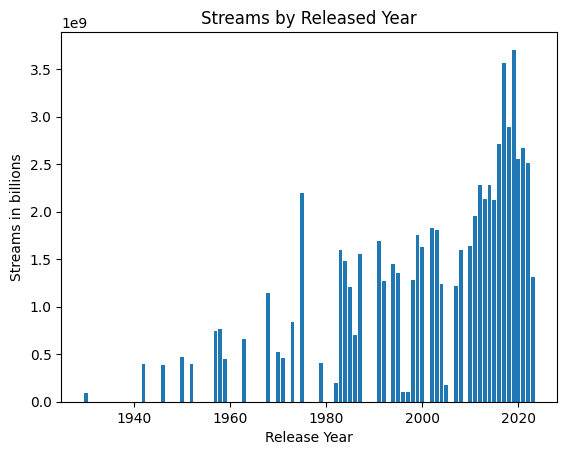

In [21]:
plt.bar(new_years_df['released_year'], new_years_df['streams'])
plt.xlabel('Release Year')
plt.ylabel('Streams in billions')
plt.title('Streams by Released Year')
plt.show()

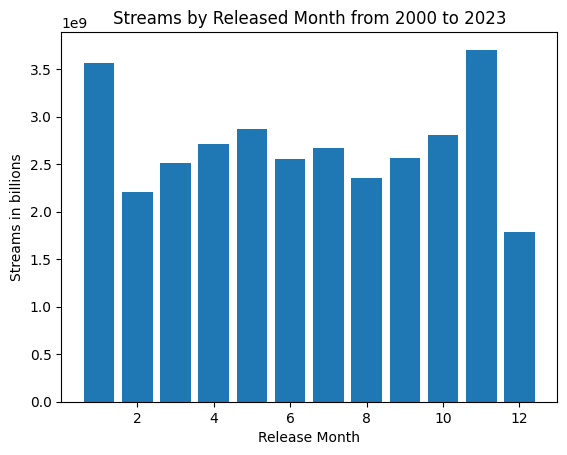

In [9]:
# create new df for years starting in 2000
recent_years_df = new_years_df[(new_years_df['released_year'] >= 2000) & (new_years_df['released_year'] <= 2023)]
recent_years_df.head(10)
plt.bar(recent_years_df['released_month'], recent_years_df['streams'])
plt.xlabel('Release Month')
plt.ylabel('Streams in billions')
plt.title("Streams by Released Month from 2000 to 2023")
plt.show()

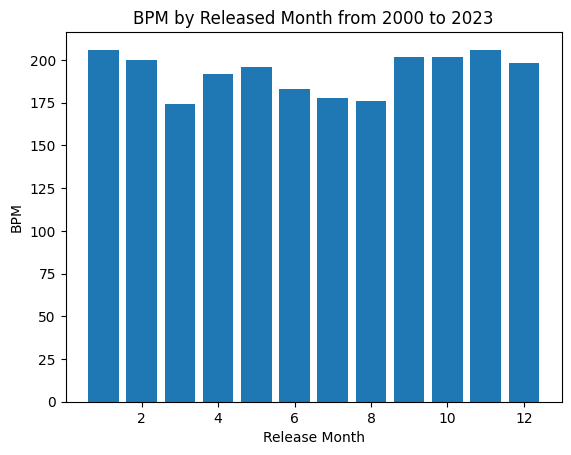

In [32]:
plt.bar(new_years_df['released_month'], new_years_df['bpm'])
plt.xlabel('Release Month')
plt.ylabel('BPM')
plt.title('BPM by Released Month from 2000 to 2023')
plt.show()

In [10]:
# creating new df for only one year
single_year_df = recent_years_df[recent_years_df['released_year'] == 2022]
single_year_df['released_month'].unique()
# reorder new df by release month
single_year_df = single_year_df.sort_values(by='released_month')
single_year_df
single_year_df['released_month'].unique()


array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12])

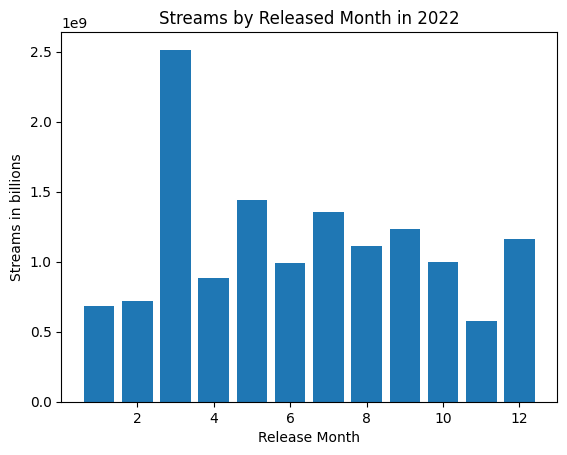

In [40]:
plt.bar(single_year_df['released_month'], single_year_df['streams'])
plt.xlabel('Release Month')
plt.ylabel('Streams in billions')
plt.title('Streams by Released Month in 2022')
plt.show()

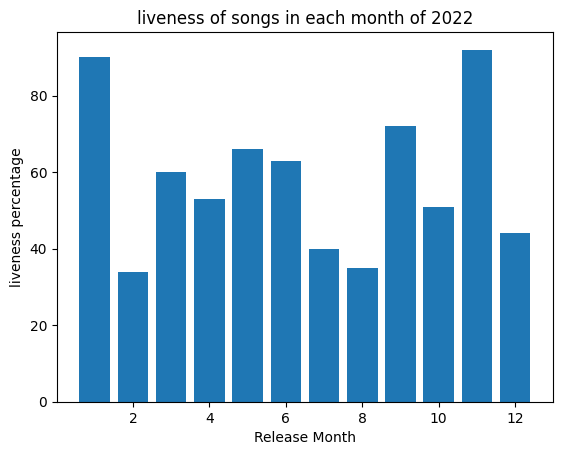

,liveness_%,streams
released_month,,
1,22.459459,1.960680e+08
2,15.500000,2.383223e+08
3,21.851852,3.786200e+08
4,14.100000,3.079466e+08
5,17.826667,3.280794e+08
6,17.034483,2.982772e+08
7,16.576923,3.897536e+08
8,18.947368,3.458030e+08
9,23.500000,2.616459e+08


In [13]:
plt.bar(single_year_df['released_month'], single_year_df['liveness_%'])
plt.xlabel('Release Month')
plt.ylabel('liveness percentage')
plt.title('liveness of songs in each month of 2022')
plt.show()
single_year_df.groupby('released_month')[['liveness_%', 'streams']].mean()

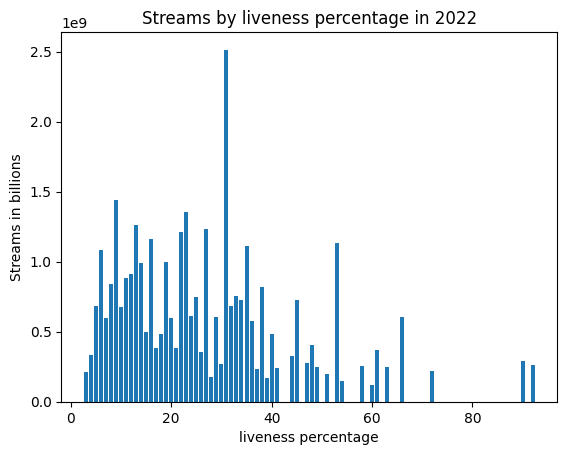

In [14]:
plt.bar(single_year_df['liveness_%'], single_year_df['streams'])
plt.xlabel('liveness percentage')
plt.ylabel('Streams in billions')
plt.title('Streams by liveness percentage in 2022')
plt.show()

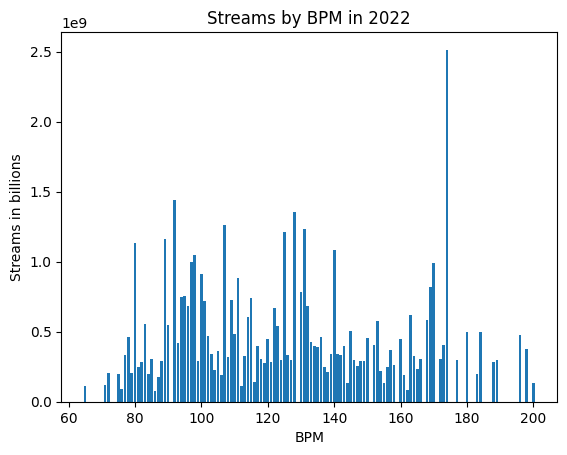

In [43]:
plt.bar(single_year_df['bpm'], single_year_df['streams'])
plt.xlabel('BPM')
plt.ylabel('Streams in billions')
plt.title('Streams by BPM in 2022')
plt.show()

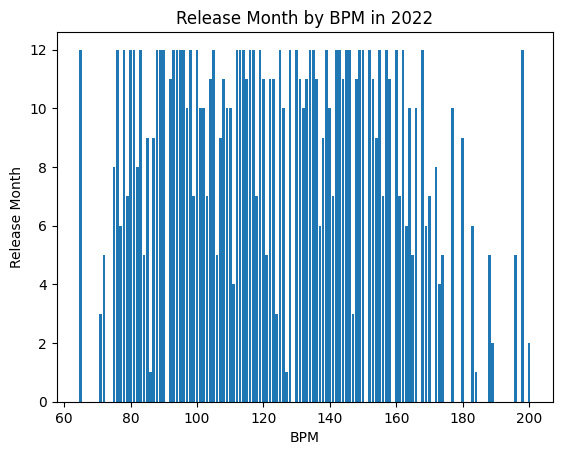

In [44]:
plt.bar(single_year_df['bpm'], single_year_df['released_month'])
plt.xlabel('BPM')
plt.ylabel('Release Month')
plt.title('Release Month by BPM in 2022')
plt.show()